In [5]:
import numpy as np
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt

# from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

import scipy.io as sio

import time

from keras.optimizers import RMSprop, Adam, Adadelta
from keras.callbacks import Callback, ModelCheckpoint

from keras.models import Model, load_model, Sequential
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers import Input, BatchNormalization, Dropout, Lambda, LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.regularizers import l2
from keras.optimizers import adagrad, Adagrad

import keras.backend as K
import tensorflow as tf

Using TensorFlow backend.


In [0]:
#paths 
test_labels_path = 'test_paths.txt'

train_labels_path = 'train_paths.txt'


In [0]:
train_labels = np.array([np.int(line.rstrip('\n').split()[1]) for line in open(train_labels_path)])
test_labels = np.array([np.int(line.rstrip('\n').split()[1]) for line in open(test_labels_path)])

In [0]:
train_im = np.array([np.str(line.rstrip('\n').split()[0]) for line in open(train_labels_path)])
test_im = np.array([np.str(line.rstrip('\n').split()[0]) for line in open(test_labels_path)])

In [0]:
train_high =[]
train_mid =[]
train_low =[]
for i in range(2345):
  if( train_labels[i] >40):
    train_high.append(train_im[i])

  if( train_labels[i] >10 and train_labels[i]<41):
    train_mid.append(train_im[i])
  
  if( train_labels[i] >=0 and train_labels[i]<=10):
    train_low.append(train_im[i])




In [0]:
test_high =[]
test_mid =[]
test_low =[]
for i in range(528):
  if( test_labels[i] >40):
    test_high.append(test_im[i])

  if( test_labels[i] >10 and test_labels[i]<41):
    test_mid.append(test_im[i])
  
  if( test_labels[i] >=0 and test_labels[i]<=10):
    test_low.append(test_im[i])




In [14]:
############################### FOR LOW TRAINING IMAGES ################################################################

#Making new annotations of low train images, renaming and correcting all annotations

#There is a built in mistake in previous annotations, I have firstly removed that mistake
#In the images, where there were no houses, the x and y locations were labelled as [-1 -1]

#I have replaced that [-1 -1] with the empty array


#So the steps I have followed are:
#(1): Read all the lower training annotations path from the train_paths.txt text file in a sequence (by applying condition house counts in between 0 and 10)
#(2): Replace all the [[-1 -1 ]] array to []
#Haven't do any augmentation, as there are enough 1581 annotations

annotations_folder = 'all_previous_annotations/'
copy_to_path = 'low_train_dir/'
#copyto path

for i in range(len(train_low)):
  annotations = sio.loadmat(annotations_folder + train_low[i]+'.mat')
  

  if(annotations['annPoints'][0][0]== -1 and annotations['annPoints'][0][0]== -1):
    annotations['annPoints'] = []

  annotations = annotations['annPoints']
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1)+".mat",{'annPoints':annotations })


KeyboardInterrupt: ignored

In [18]:
pwd

'/content/drive/My Drive/DrawingAnnotationsOverImages/Augmenting_Annotations/Next'

IndexError: ignored

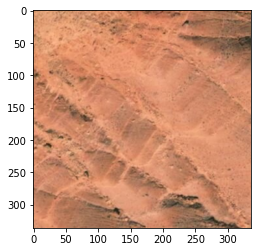

In [149]:
##################################   load one sample image of IMG_1581.tiff (last from this folder)  from lower training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_1581.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('low_train_dir/GT_IMG_1581.mat')
annotations = annotations['annPoints']
plt.imshow(house)
#if(annotations[:,0] and annotations[:,1]):
plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
############################### FOR LOW TESTING IMAGES ################################################################


#Making new annotations of low test images, renaming and correcting all annotations

#There is a built in mistake in previous annotations, I have firstly removed that mistake
#In the images, where there were no houses, the x and y locations were labelled as [-1 -1]

#I have replaced that [-1 -1] with the empty array


#So the steps I have followed are:
#(1): Read all the lower testing annotations path from the test_paths.txt test text file in a sequence (by applying condition house counts in between 0 and 10)
#(2): Replace all the [[-1 -1 ]] array to []
#Haven't do any augmentation, as there are enough 357 annotations

annotations_folder = 'all_previous_annotations/'
copy_to_path = 'low_test_dir/'
#copyto path

for i in range(len(test_low)):
  annotations = sio.loadmat(annotations_folder + test_low[i]+'.mat')
  

  if(annotations['annPoints'][0][0]== -1 and annotations['annPoints'][0][0]== -1):
    annotations['annPoints'] = []

  annotations = annotations['annPoints']
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1)+'.mat',{'annPoints':annotations })


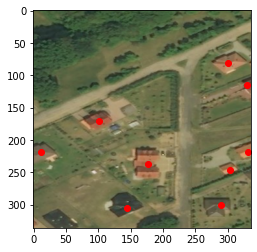

In [146]:
##################################   load one sample image of IMG_357.tiff (last from this folder) from lower testing dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_357.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('low_test_dir/GT_IMG_357.mat')
annotations = annotations['annPoints']

plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
############################### FOR MID TRAINING IMAGES ################################################################


#Making new annotations of  mid train images, renaming and correcting all annotations

#There is no built in mistake here



#So the steps I have followed are:
#(1): Read all the mid training annotations path from the train_paths.txt train text file in a sequence (by applying condition house counts in between 11 and 40)
#(2): Save the mat files just by renaming it (rename 551 mat files from GT_IMG_1 to GT_IMG_551)
#(3): Save the mat files rotating it by 90 degrees and renaming it accordingly (rename 551 mat files from GT_IMG_552 to GT_IMG_1102)
#(4): Save the mat files rotating it by 180 degrees and renaming it accordingly (rename 551 mat files from GT_IMG_1103 to GT_IMG_1653)
#(5): Save the mat files rotating it by 270 degrees and renaming it accordingly (rename 551 mat files from GT_IMG_1654 to GT_IMG_2204)


#(2): Save the mat files just by renaming it (rename 551 mat files from GT_IMG_1 to GT_IMG_551)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'mid_train_dir/'
#copyto path

for i in range(len(train_mid)):
  annotations = sio.loadmat(annotations_folder + train_mid[i]+'.mat')
  annotations = annotations['annPoints']
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1)+'.mat',{'annPoints':annotations })

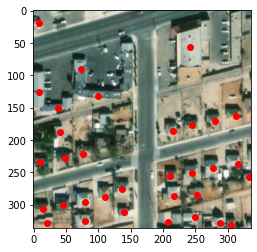

In [156]:
##################################   load one sample image of IMG_551.tiff (last from the original images)  from mid training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_551.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('mid_train_dir/GT_IMG_551.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
#(3): Save the mat files rotating it by 90 degrees and renaming it accordingly (rename 551 mat files from GT_IMG_552 to GT_IMG_1102)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'mid_train_dir/'
#copyto path

for i in range(len(train_mid)):
  annotations = sio.loadmat(annotations_folder + train_mid[i]+'.mat')
  annotations = annotations['annPoints']
  img1 = np.zeros((336,336),dtype=np.float32)
  x = annotations[:,0]
  y = annotations[:,1]
  #len(x) and len(y) are equal
  for z in range(len(x)):
    #if(x[z]>336):
      #x[z] =335
    if(y[z]>336):
      y[z] =335
  
  
  img1[y.reshape(-1).astype(int) ,x.reshape(-1).astype(int) ] = 1
  flip_r = np.rot90(img1)
  #flipr
  ind = np.argwhere(flip_r==1)
  m= ind[:,0]
  n = ind[:,1]
  r = annotations
  #annotations[:,0] and annotations[:,1] are equal
  for j in range (len(annotations[:,0])):
    r[j][0] = n[j]
    r[j][1]= m[j]
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+552)+'.mat',{'annPoints':r})

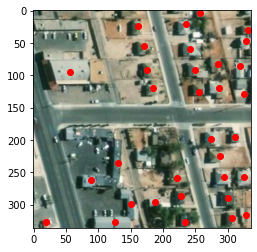

In [159]:
##################################   load one sample image of IMG_1102.tiff (last from the images rotated by 90 degrees)  from mid training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_1102.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('mid_train_dir/GT_IMG_1102.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
#(4): Save the mat files rotating it by 180 degrees and renaming it accordingly (rename 551 mat files from GT_IMG_1103 to GT_IMG_1653)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'mid_train_dir/'
#copyto path

for i in range(len(train_mid)):
  annotations = sio.loadmat(annotations_folder + train_mid[i]+'.mat')
  annotations = annotations['annPoints']
  img1 = np.zeros((336,336),dtype=np.float32)
  x = annotations[:,0]
  y = annotations[:,1]
  #len(x) and len(y) are equal
  for z in range(len(x)):
    #if(x[z]>336):
      #x[z] =335
    if(y[z]>336):
      y[z] =335
  
  
  img1[y.reshape(-1).astype(int) ,x.reshape(-1).astype(int) ] = 1
  flip_r = np.rot90(img1,2)
  #flipr
  ind = np.argwhere(flip_r==1)
  m= ind[:,0]
  n = ind[:,1]
  r = annotations
  #annotations[:,0] and annotations[:,1] are equal
  for j in range (len(annotations[:,0])):
    r[j][0] = n[j]
    r[j][1]= m[j]
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1103)+'.mat',{'annPoints':r})

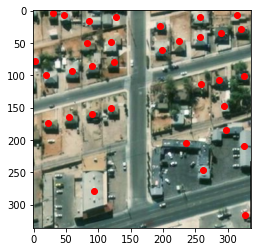

In [164]:
##################################   load one sample image of IMG_1653.tiff (last from the images rotated by 180 degrees)  from mid training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_1653.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('mid_train_dir/GT_IMG_1653.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
#(5): Save the mat files rotating it by 270 degrees and renaming it accordingly (rename 551 mat files from GT_IMG_1654 to GT_IMG_2204)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'mid_train_dir/'
#copyto path

for i in range(len(train_mid)):
  annotations = sio.loadmat(annotations_folder + train_mid[i]+'.mat')
  annotations = annotations['annPoints']
  img1 = np.zeros((336,336),dtype=np.float32)
  x = annotations[:,0]
  y = annotations[:,1]
  #len(x) and len(y) are equal
  for z in range(len(x)):
    #if(x[z]>336):
      #x[z] =335
    if(y[z]>336):
     y[z] =335
  
  
  img1[y.reshape(-1).astype(int) ,x.reshape(-1).astype(int) ] = 1
  flip_r = np.rot90(img1,3)
  #flipr
  ind = np.argwhere(flip_r==1)
  m= ind[:,0]
  n = ind[:,1]
  r = annotations
  #annotations[:,0] and annotations[:,1] are equal
  for j in range (len(annotations[:,0])):
    r[j][0] = n[j]
    r[j][1]= m[j]
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1654)+'.mat',{'annPoints':r})

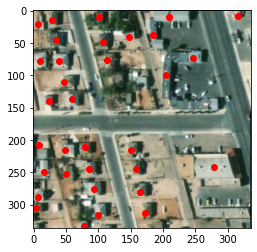

In [166]:
##################################   load one sample image of IMG_2204.tiff (last from the images rotated by 270 degrees)  from mid training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_2204.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('mid_train_dir/GT_IMG_2204.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
############################### FOR MID TESTING IMAGES ################################################################


#Making new annotations of  mid test images, renaming and correcting all annotations

#There is no built in mistake here



#So the steps I have followed are:
#(1): Read all the mid testing annotations path from the test_paths.txt test text file in a sequence (by applying condition house counts in between 11 and 40)
#(2): Save the mat files just by renaming it (rename 119 mat files from GT_IMG_1 to GT_IMG_119)
#No augmentations required


#(2): Save the mat files just by renaming it (rename 119 mat files from GT_IMG_1 to GT_IMG_119)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'mid_test_dir/'
#copyto path

for i in range(len(test_mid)):
  annotations = sio.loadmat(annotations_folder + test_mid[i]+'.mat')
  annotations = annotations['annPoints']
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1)+'.mat',{'annPoints':annotations })

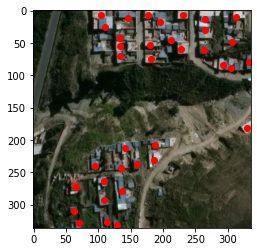

In [167]:
##################################   load one sample image of IMG_119.tiff (last from this folder) from mid testing dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_119.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('mid_test_dir/GT_IMG_119.mat')
annotations = annotations['annPoints']

plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
############################### FOR HIGH TRAINING IMAGES ################################################################


#Making new annotations of  high train images, renaming and correcting all annotations

#There is no built in mistake here



#So the steps I have followed are:
#(1): Read all the high training annotations path from the train_paths.txt train text file in a sequence (by applying condition house counts greater than 40)
#(2): Save the mat files just by renaming it (rename 213 mat files from GT_IMG_1 to GT_IMG_213)
#(3): Save the mat files rotating it by 90 degrees and renaming it accordingly (rename 213 mat files from GT_IMG_214 to GT_IMG_426)
#(4): Save the mat files rotating it by 180 degrees and renaming it accordingly (rename 213 mat files from GT_IMG_427 to GT_IMG_639)
#(5): Save the mat files rotating it by 270 degrees and renaming it accordingly (rename 213 mat files from GT_IMG_640 to GT_IMG_852)


#(2): Save the mat files just by renaming it (rename 213 mat files from GT_IMG_1 to GT_IMG_213)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'high_train_dir/'
#copyto path

for i in range(len(train_high)):
  annotations = sio.loadmat(annotations_folder + train_high[i]+'.mat')
  annotations = annotations['annPoints']
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1)+'.mat',{'annPoints':annotations })

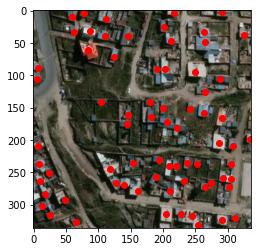

In [169]:
##################################   load one sample image of IMG_213.tiff (last from the original images)  from high training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_213.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('high_train_dir/GT_IMG_213.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
#(3): Save the mat files rotating it by 90 degrees and renaming it accordingly (rename 213 mat files from GT_IMG_214 to GT_IMG_426)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'high_train_dir/'
#copyto path

for i in range(len(train_high)):
  annotations = sio.loadmat(annotations_folder + train_high[i]+'.mat')
  annotations = annotations['annPoints']
  img1 = np.zeros((336,336),dtype=np.float32)
  x = annotations[:,0]
  y = annotations[:,1]
  #len(x) and len(y) are equal
  for z in range(len(x)):
    if(x[z]>336):
      x[z] =335
    if(y[z]>336):
      y[z] =335
  
  
  img1[y.reshape(-1).astype(int) ,x.reshape(-1).astype(int) ] = 1
  flip_r = np.rot90(img1)
  #flipr
  ind = np.argwhere(flip_r==1)
  m= ind[:,0]
  n = ind[:,1]
  r = annotations
  #annotations[:,0] and annotations[:,1] are equal
  for j in range (len(annotations[:,0])):
    r[j][0] = n[j]
    r[j][1]= m[j]
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+214)+'.mat',{'annPoints':r})

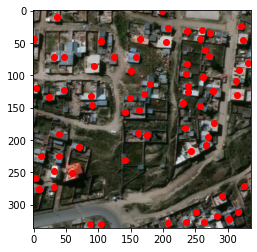

In [171]:
##################################   load one sample image of IMG_426.tiff (last from the images rotated by 90 degrees)  from high training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_426.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('high_train_dir/GT_IMG_426.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
#(4): Save the mat files rotating it by 180 degrees and renaming it accordingly (rename 213 mat files from GT_IMG_427 to GT_IMG_639)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'high_train_dir/'
#copyto path

for i in range(len(train_high)):
  annotations = sio.loadmat(annotations_folder + train_high[i]+'.mat')
  annotations = annotations['annPoints']
  img1 = np.zeros((336,336),dtype=np.float32)
  x = annotations[:,0]
  y = annotations[:,1]
  #len(x) and len(y) are equal
  for z in range(len(x)):
    if(x[z]>336):
      x[z] =335
    if(y[z]>336):
      y[z] =335
  
  
  img1[y.reshape(-1).astype(int) ,x.reshape(-1).astype(int) ] = 1
  flip_r = np.rot90(img1,2)
  #flipr
  ind = np.argwhere(flip_r==1)
  m= ind[:,0]
  n = ind[:,1]
  r = annotations
  #annotations[:,0] and annotations[:,1] are equal
  for j in range (len(annotations[:,0])):
    r[j][0] = n[j]
    r[j][1]= m[j]
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+427)+'.mat',{'annPoints':r})

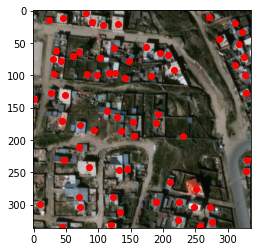

In [172]:
##################################   load one sample image of IMG_639.tiff (last from the images rotated by 180 degrees)  from high training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_639.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('high_train_dir/GT_IMG_639.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
#(5): Save the mat files rotating it by 270 degrees and renaming it accordingly (rename 213 mat files from GT_IMG_640 to GT_IMG_852)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'high_train_dir/'
#copyto path

for i in range(len(train_high)):
  annotations = sio.loadmat(annotations_folder + train_high[i]+'.mat')
  annotations = annotations['annPoints']
  img1 = np.zeros((336,336),dtype=np.float32)
  x = annotations[:,0]
  y = annotations[:,1]
  #len(x) and len(y) are equal
  for z in range(len(x)):
    if(x[z]>336):
      x[z] =335
    if(y[z]>336):
     y[z] =335
  
  
  img1[y.reshape(-1).astype(int) ,x.reshape(-1).astype(int) ] = 1
  flip_r = np.rot90(img1,3)
  #flipr
  ind = np.argwhere(flip_r==1)
  m= ind[:,0]
  n = ind[:,1]
  r = annotations
  #annotations[:,0] and annotations[:,1] are equal
  for j in range (len(annotations[:,0])):
    r[j][0] = n[j]
    r[j][1]= m[j]
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+640)+'.mat',{'annPoints':r})

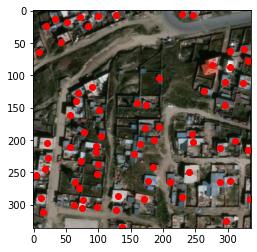

In [173]:
##################################   load one sample image of IMG_852.tiff (last from the images rotated by 270 degrees)  from high training dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_852.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('high_train_dir/GT_IMG_852.mat')
annotations = annotations['annPoints']
plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')

In [0]:
############################### FOR HIGH TESTING IMAGES ################################################################


#Making new annotations of  high test images, renaming and correcting all annotations

#There is no built in mistake here



#So the steps I have followed are:
#(1): Read all the high testing annotations path from the test_paths.txt test text file in a sequence (by applying condition house counts greater than 40)
#(2): Save the mat files just by renaming it (rename 52 mat files from GT_IMG_1 to GT_IMG_52)
#No augmentations required


#(2): Save the mat files just by renaming it (rename 52 mat files from GT_IMG_1 to GT_IMG_52)
annotations_folder = 'all_previous_annotations/'
copy_to_path = 'high_test_dir/'
#copyto path

for i in range(len(test_high)):
  annotations = sio.loadmat(annotations_folder + test_high[i]+'.mat')
  annotations = annotations['annPoints']
  sio.savemat(copy_to_path+"GT_IMG_"+str(i+1)+'.mat',{'annPoints':annotations })

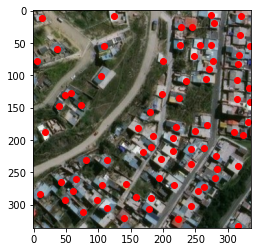

In [182]:
##################################   load one sample image of IMG_52.tiff (last from this folder) from high testing dataset in the root folder  #######################################

import imageio
house = imageio.imread('IMG_52.tiff')
import matplotlib.pyplot as plt
import scipy.io as sio
annotations = sio.loadmat('high_test_dir/GT_IMG_52.mat')
annotations = annotations['annPoints']

plt.imshow(house)

plt.plot(annotations[:,0],annotations[:,1], 'ro')